In [1]:
import pandas as pd
import streamlit as st
import plotly.express as px

In [ ]:
df1= pd.read_csv('customers (1).csv')
df2= pd.read_csv ('orders (1).csv')
df3= pd.read_csv('sales (1).csv')
df4 = pd.read_csv('products (1).csv')
df4.rename({'product_ID' : 'product_id'} , axis=1 , inplace=True)
df=pd.merge(df1 , df2 , on='customer_id')
df_1=pd.merge(df , df3 , on='order_id')
df_3=pd.merge(df_1 , df4 , on='product_id')

df_3.to_csv('shopping_cart.csv')


data=pd.read_csv('shopping_cart.csv')
data.drop('Unnamed: 0' , axis=1 , inplace=True)
data

In [4]:
data.columns

Index(['customer_id', 'customer_name', 'gender', 'age', 'home_address',
       'zip_code', 'city', 'state', 'country', 'order_id', 'payment',
       'order_date', 'delivery_date', 'sales_id', 'product_id',
       'price_per_unit', 'quantity_x', 'total_price', 'product_type',
       'product_name', 'size', 'colour', 'price', 'quantity_y', 'description'],
      dtype='object')

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,5000.0,504.5630,276.504896,1.0,276.00,509.0,733.00,1000.0
age,5000.0,48.7604,17.577519,20.0,34.00,48.0,63.00,80.0
zip_code,5000.0,4912.3556,2907.367939,52.0,2273.00,4750.0,7460.25,9998.0
order_id,5000.0,503.0382,285.964418,1.0,258.00,504.5,749.00,999.0
payment,5000.0,33976.7850,14612.706539,10043.0,20627.00,34259.0,46608.00,59910.0
sales_id,5000.0,2499.5000,1443.520003,0.0,1249.75,2499.5,3749.25,4999.0
product_id,5000.0,634.0532,363.255794,1.0,323.00,635.0,951.00,1259.0
price_per_unit,5000.0,103.5016,9.195004,90.0,95.00,102.0,112.00,119.0
quantity_x,5000.0,1.9924,0.807510,1.0,1.00,2.0,3.00,3.0
total_price,5000.0,206.3600,86.357457,90.0,112.00,204.0,285.00,357.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     5000 non-null   int64 
 1   customer_name   5000 non-null   object
 2   gender          5000 non-null   object
 3   age             5000 non-null   int64 
 4   home_address    5000 non-null   object
 5   zip_code        5000 non-null   int64 
 6   city            5000 non-null   object
 7   state           5000 non-null   object
 8   country         5000 non-null   object
 9   order_id        5000 non-null   int64 
 10  payment         5000 non-null   int64 
 11  order_date      5000 non-null   object
 12  delivery_date   5000 non-null   object
 13  sales_id        5000 non-null   int64 
 14  product_id      5000 non-null   int64 
 15  price_per_unit  5000 non-null   int64 
 16  quantity_x      5000 non-null   int64 
 17  total_price     5000 non-null   int64 
 18  product_

In [7]:
data.isnull()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,...,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,price,quantity_y,description
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
data.describe()

,customer_id,age,zip_code,order_id,payment,sales_id,product_id,price_per_unit,quantity_x,total_price,price,quantity_y
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,504.563000,48.760400,4912.355600,503.038200,33976.785000,2499.500000,634.053200,103.501600,1.99240,206.360000,105.665400,60.083400
std,276.504896,17.577519,2907.367939,285.964418,14612.706539,1443.520003,363.255794,9.195004,0.80751,86.357457,9.735564,11.682523
min,1.000000,20.000000,52.000000,1.000000,10043.000000,0.000000,1.000000,90.000000,1.00000,90.000000,90.000000,40.000000
25%,276.000000,34.000000,2273.000000,258.000000,20627.000000,1249.750000,323.000000,95.000000,1.00000,112.000000,95.000000,50.000000
50%,509.000000,48.000000,4750.000000,504.500000,34259.000000,2499.500000,635.000000,102.000000,2.00000,204.000000,108.000000,60.000000
75%,733.000000,63.000000,7460.250000,749.000000,46608.000000,3749.250000,951.000000,112.000000,3.00000,285.000000,114.000000,70.000000
max,1000.000000,80.000000,9998.000000,999.000000,59910.000000,4999.000000,1259.000000,119.000000,3.00000,357.000000,119.000000,80.000000


In [ ]:
data['order_date'] = pd.to_datetime(data['order_date'])
data['delivery_date'] = pd.to_datetime(data['delivery_date'])

data['order_year'] = data['order_date'].dt.year
data['order_month'] = data['order_date'].dt.month
data['order_day'] = data['order_date'].dt.day
data['order_weekday'] = data['order_date'].dt.weekday
data["name_day_order"] = data["order_date"].dt.day_name()

data['delivery_year'] = data['delivery_date'].dt.year
data['delivery_month'] = data['delivery_date'].dt.month
data['delivery_day'] = data['delivery_date'].dt.day
data['delivery_weekday'] = data['delivery_date'].dt.weekday
data["name_day_delivery"] = data["delivery_date"].dt.day_name()

In [11]:
data['differance'] = data['delivery_date']- data['order_date']

In [12]:
data.differance.unique()

<TimedeltaArray>
[ '2 days', '26 days', '11 days', '20 days',  '8 days', '12 days', '15 days',
 '14 days', '24 days', '10 days',  '9 days',  '1 days', '13 days', '21 days',
 '16 days',  '5 days', '22 days',  '3 days', '19 days', '18 days',  '6 days',
 '25 days', '23 days',  '7 days', '17 days',  '4 days', '27 days']
Length: 27, dtype: timedelta64[ns]

In [119]:
data.columns

Index(['customer_id', 'customer_name', 'gender', 'age', 'home_address',
       'zip_code', 'city', 'state', 'country', 'order_id', 'payment',
       'order_date', 'delivery_date', 'sales_id', 'product_id',
       'price_per_unit', 'quantity_x', 'total_price', 'product_type',
       'product_name', 'size', 'colour', 'price', 'quantity_y', 'description',
       'order_year', 'order_month', 'order_day', 'order_weekday',
       'delivery_year', 'delivery_month', 'delivery_day', 'delivery_weekday',
       'differance', 'name_day_order', 'name_day_delivery'],
      dtype='object')

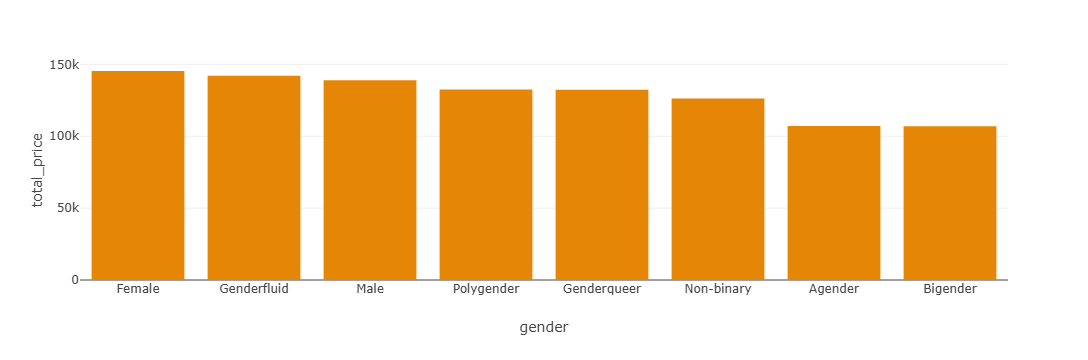

In [190]:
# what is the total money that each gender spent?
money_gender =data.groupby('gender')[['total_price']].sum().sort_values(by="total_price" , ascending = False).reset_index()
money_gender

fig1 = px.bar(money_gender, x='gender', y='total_price' , color_discrete_sequence=px.colors.qualitative.Vivid)
fig1.show()

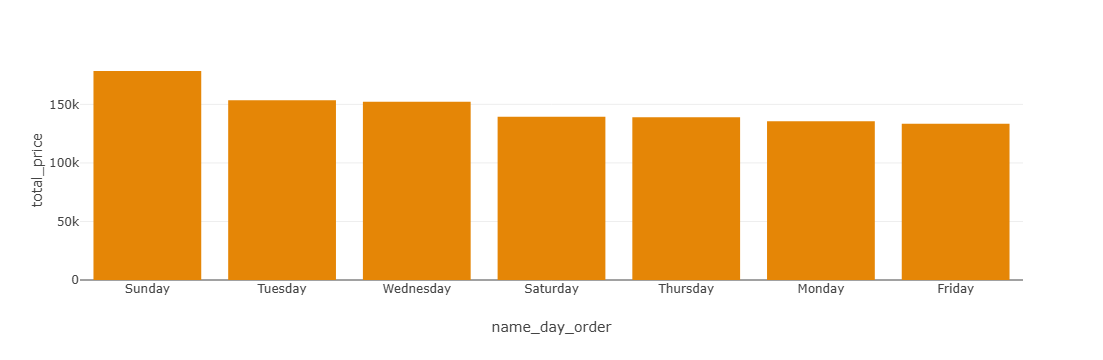

In [136]:
# what is the most day that get highest income
high_day = data.groupby('name_day_order')[['total_price']].sum().sort_values(by='total_price'  , ascending = False).reset_index()
high_day 

fig2 = px.bar(high_day, x='name_day_order', y='total_price' , color_discrete_sequence=px.colors.qualitative.Vivid)
fig2.show()

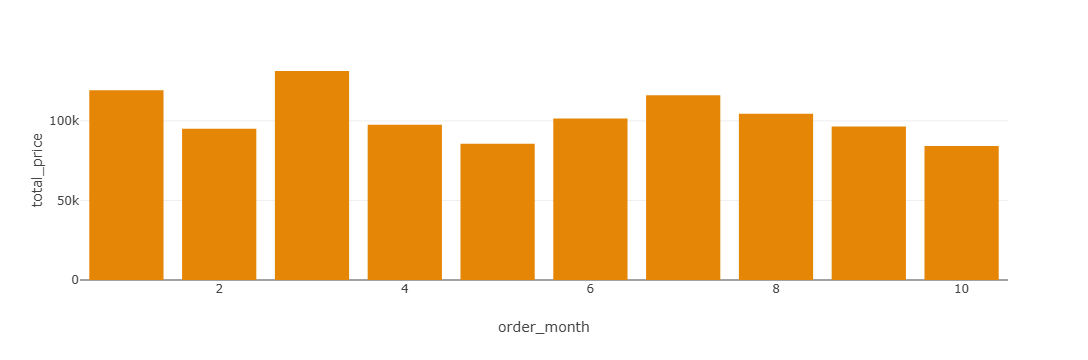

In [137]:
# what is the highest month that get the highest sales ?
high_month = data.groupby('order_month')[['total_price']].sum().sort_values(by='total_price' , ascending = False).reset_index()
high_month

fig3 = px.bar(high_month, x='order_month', y='total_price' , color_discrete_sequence=px.colors.qualitative.Vivid)
fig3.show()

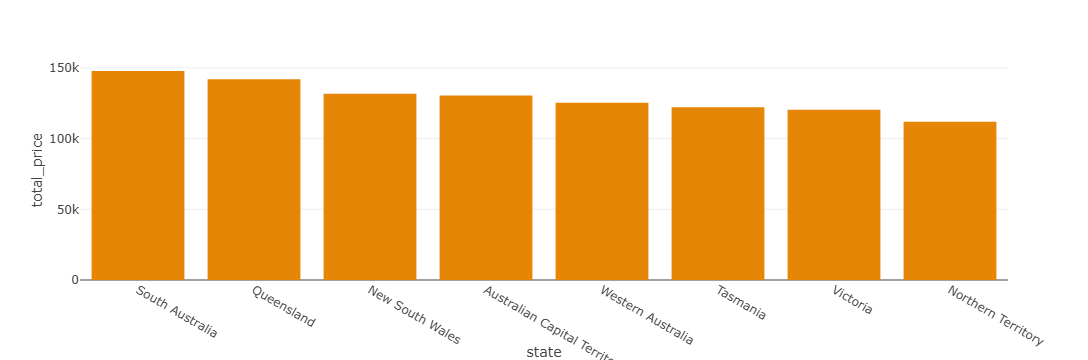

In [138]:
# what is the highest state achieve the highest salees ?
high_state = data.groupby('state')[['total_price']].sum().sort_values(by='total_price' , ascending = False).reset_index()
high_state

fig4= px.bar(high_state, x='state', y='total_price' , color_discrete_sequence=px.colors.qualitative.Vivid)
fig4.show()

In [132]:
# what is the highest state per gender achieve the highest sales ?
data.groupby(['state', 'gender'])[['total_price']].sum().sort_values(by='total_price' , ascending = False)

,,total_price
state,gender,
Queensland,Polygender,28553
South Australia,Genderqueer,25088
Victoria,Male,24626
Western Australia,Non-binary,24011
Queensland,Genderqueer,23791
...,...,...
Australian Capital Territory,Genderqueer,8722
Victoria,Agender,7812
Queensland,Non-binary,7215


In [140]:
# what is the average age per state ?
data.groupby(['state'])[['age']].mean().sort_values(by='age' , ascending = False).round()

,age
state,
New South Wales,54.0
Queensland,51.0
Northern Territory,49.0
South Australia,49.0
Tasmania,48.0
Australian Capital Territory,48.0
Western Australia,47.0
Victoria,44.0


In [100]:
# what is the average age per state per each gender ?
data.groupby(['state' , 'gender'])[['age']].mean().sort_values(by='age' , ascending = False).round().reset_index()

,state,gender,age
0,Queensland,Non-binary,70.0
1,Western Australia,Non-binary,62.0
2,Tasmania,Genderqueer,60.0
3,New South Wales,Female,58.0
4,Queensland,Male,58.0
...,...,...,...
59,South Australia,Polygender,39.0
60,Western Australia,Genderfluid,36.0
61,Western Australia,Female,34.0
62,Tasmania,Genderfluid,34.0


In [171]:
# what is the average age per city per each gender ?
data.groupby(['city' , 'gender'])[['age']].mean().sort_values(by='age' , ascending = False).round()

,,age
city,gender,
South Gabriel,Agender,80.0
Lake Michaelbury,Genderfluid,80.0
Port Aaronton,Genderfluid,80.0
Port Sophia,Male,80.0
Port Sebastianland,Agender,80.0
...,...,...
West Amber,Agender,20.0
New Alexchester,Genderfluid,20.0
New Aidenfurt,Male,20.0


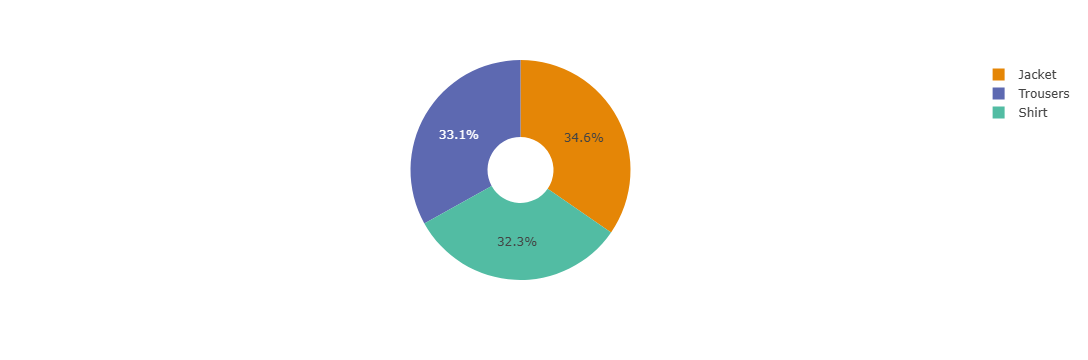

In [139]:
# what is the product type that have the highest sales ?
h_sales=data.groupby(['product_type'])[['total_price']].sum().sort_values(by='total_price' , ascending = False).reset_index()
h_sales

fig = px.pie(h_sales, values='total_price', names='product_type', hole=.3,color_discrete_sequence=px.colors.qualitative.Vivid)
fig.show()

In [97]:
# what is the color of the product type that have highest sales?
revenue_by_product_type = data.groupby(['product_type' , 'colour'])[['total_price']].sum().sort_values(by='total_price' , ascending = False).reset_index()
revenue_by_product_type

,product_type,colour,total_price
0,Jacket,blue,56381
1,Jacket,green,55160
2,Shirt,violet,53583
3,Trousers,blue,53392
4,Trousers,indigo,50487
5,Jacket,yellow,50451
6,Jacket,red,50063
7,Jacket,indigo,49791
8,Shirt,indigo,49161
9,Jacket,violet,48839


In [146]:
data.columns

Index(['customer_id', 'customer_name', 'gender', 'age', 'home_address',
       'zip_code', 'city', 'state', 'country', 'order_id', 'payment',
       'order_date', 'delivery_date', 'sales_id', 'product_id',
       'price_per_unit', 'quantity_x', 'total_price', 'product_type',
       'product_name', 'size', 'colour', 'price', 'quantity_y', 'description',
       'order_year', 'order_month', 'order_day', 'order_weekday',
       'delivery_year', 'delivery_month', 'delivery_day', 'delivery_weekday',
       'differance', 'name_day_order', 'name_day_delivery'],
      dtype='object')

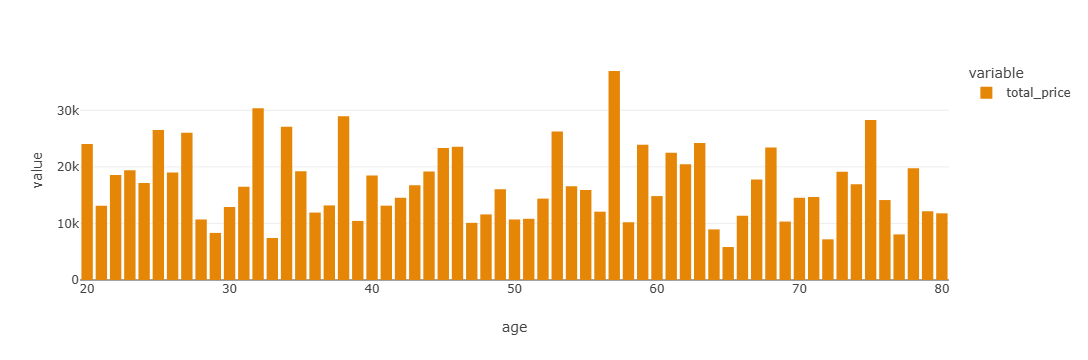

In [146]:
#top ages having highest sales.
top_ages=data.groupby(['age'])[['total_price']].sum().sort_values(by='total_price' , ascending = False).reset_index()
top_ages

fig2 = px.bar(top_ages, x="age", y=top_ages.columns[1:] ,color_discrete_sequence=px.colors.qualitative.Vivid  )
fig2.show()

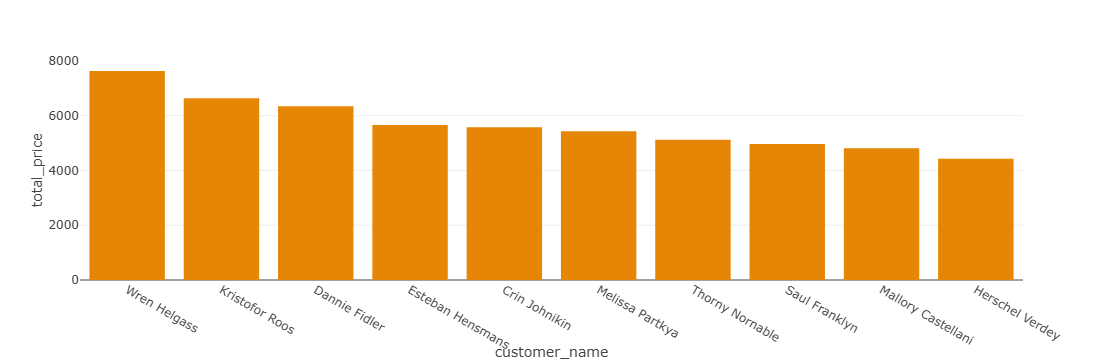

In [154]:
#Which customers are the most loyal ?
loyalty = data.groupby(['customer_name'])[['total_price']].sum().sort_values(by='total_price' , ascending = False).head(10)
fig = px.bar(loyalty, y='total_price' , color_discrete_sequence=px.colors.qualitative.Vivid)
fig.show()

In [76]:
data.columns

Index(['customer_id', 'customer_name', 'gender', 'age', 'home_address',
       'zip_code', 'city', 'state', 'country', 'order_id', 'payment',
       'order_date', 'delivery_date', 'sales_id', 'product_id',
       'price_per_unit', 'quantity_x', 'total_price', 'product_type',
       'product_name', 'size', 'colour', 'price', 'quantity_y', 'description',
       'order_year', 'order_month', 'order_day', 'order_weekday',
       'name_day_order', 'delivery_year', 'delivery_month', 'delivery_day',
       'delivery_weekday', 'name_day_delivery', 'differance', 'revenue'],
      dtype='object')

In [77]:
data.head(5)

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,...,order_day,order_weekday,name_day_order,delivery_year,delivery_month,delivery_day,delivery_weekday,name_day_delivery,differance,revenue
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,455,...,4,6,Sunday,2021,4,6,1,Tuesday,2 days,-1
1,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,455,...,4,6,Sunday,2021,4,6,1,Tuesday,2 days,23
2,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,670,...,6,5,Saturday,2021,4,1,3,Thursday,26 days,15
3,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,670,...,6,5,Saturday,2021,4,1,3,Thursday,26 days,23
4,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,670,...,6,5,Saturday,2021,4,1,3,Thursday,26 days,14


In [75]:
#data[['price' , 'total_price' , 'price_per_unit' , 'quantity_x' , 'quantity_y' #quantity of el kt3 el mosn3a]]
data['revenue'] = data['price'] - data['price_per_unit']
data['revenue'].unique()

array([ -1,  23,  15,  14, -16, -21, -22,  -6,   5,  25, -10,   7, -13,
        22, -15,  -8,   6,  -7,  18,   8,   1, -12,   4,  19,  -2])

In [88]:
data['gross_profit'] = data['revenue'] *data[ 'quantity_x']

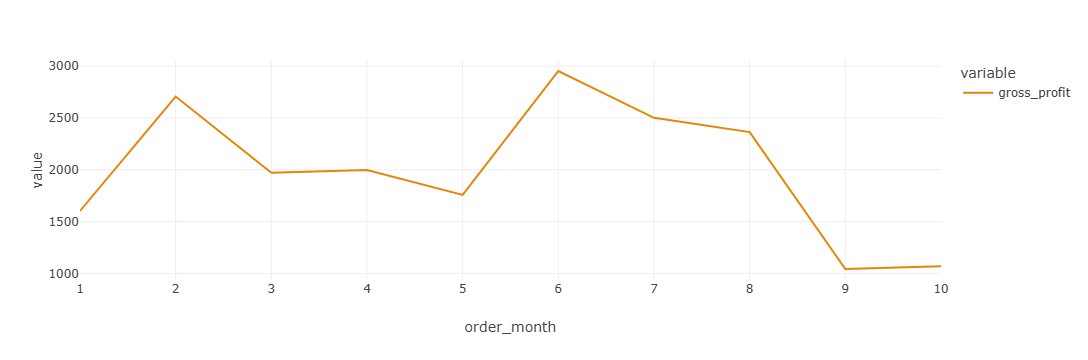

In [155]:
gross_profit =data.groupby(['order_month'])[['gross_profit']].sum().sort_values(by='order_month' , ascending=False).reset_index()
gross_profit

fig4 = px.line(gross_profit, x="order_month", y=gross_profit.columns[1:] , color_discrete_sequence=px.colors.qualitative.Vivid)
fig4.show()

In [83]:
revenue_per_unit = data.groupby('order_month')[['revenue' ]].sum().sort_values(by='order_month' , ascending= False). reset_index()
revenue_per_unit

,order_month,revenue
0,10,765
1,9,783
2,8,1383
3,7,1380
4,6,1357
5,5,860
6,4,966
7,3,851
8,2,1387
9,1,1087


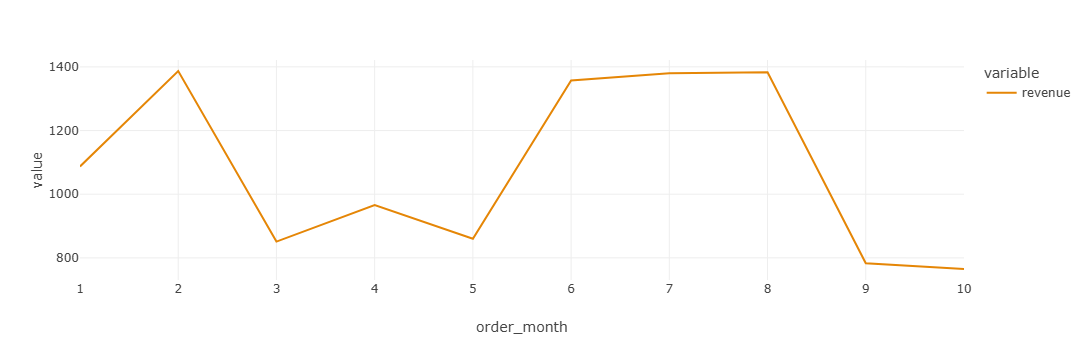

In [157]:
revenue_by_date = data.groupby('order_month')[['revenue']].sum().sort_values(by='order_month' , ascending= False).reset_index()
revenue_by_date

fig5 = px.line(revenue_by_date, x="order_month", y=revenue_by_date.columns[1:] , color_discrete_sequence=px.colors.qualitative.Vivid)
fig5.show()

In [99]:
revenue_by_date = data.groupby('order_month')[['total_price']].sum().sort_values(by='order_month' , ascending= False). reset_index()
revenue_by_date

,order_month,total_price
0,10,84266
1,9,96526
2,8,104565
3,7,116081
4,6,101458
5,5,85597
6,4,97530
7,3,131364
8,2,95080
9,1,119333


In [110]:
data.columns

Index(['customer_id', 'customer_name', 'gender', 'age', 'home_address',
       'zip_code', 'city', 'state', 'country', 'order_id', 'payment',
       'order_date', 'delivery_date', 'sales_id', 'product_id',
       'price_per_unit', 'quantity_x', 'total_price', 'product_type',
       'product_name', 'size', 'colour', 'price', 'quantity_y', 'description',
       'order_year', 'order_month', 'order_day', 'order_weekday',
       'name_day_order', 'delivery_year', 'delivery_month', 'delivery_day',
       'delivery_weekday', 'name_day_delivery', 'differance', 'revenue',
       'gross_profit'],
      dtype='object')

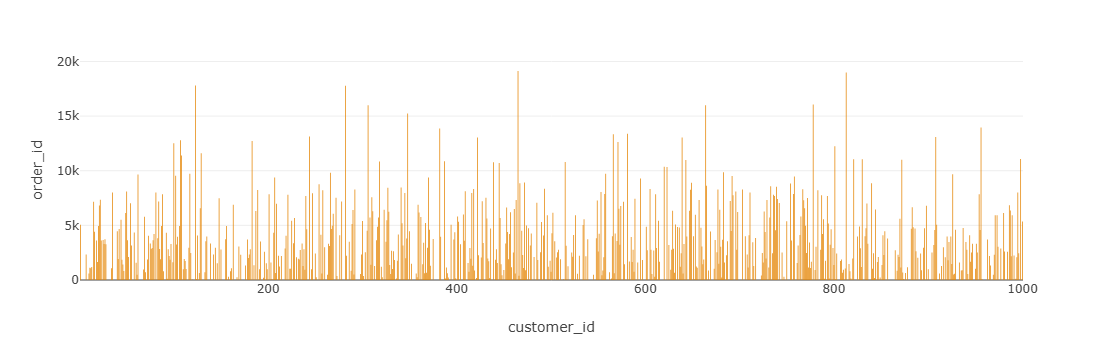

"fig = px.histogram(customer_Purchase_Frequency,nbins= 8 ,\n                   color_discrete_sequence=px.colors.qualitative.Vivid ,\n                   title='Customer Purchase Frequency Distribution') \nfig.show()"

In [187]:
customer_Purchase_Frequency= data.groupby(['customer_id'])[['order_id']].sum().sort_values(by='customer_id' , ascending=False).reset_index()
customer_Purchase_Frequency

fig = px.bar(customer_Purchase_Frequency, x="customer_id", y='order_id' , color_discrete_sequence=px.colors.qualitative.Vivid )
fig.show()
""

"""fig = px.histogram(customer_Purchase_Frequency,nbins= 8 ,
                   color_discrete_sequence=px.colors.qualitative.Vivid ,
                   title='Customer Purchase Frequency Distribution') 
fig.show()"""

In [ ]:
"""dgenre= pd.read_csv('dgenre.csv')
df= pd.read_csv('movie1.csv')
top_per_ur= pd.read_csv('top_per_ur.csv')
top_per_ms= pd.read_csv('top_per_ms.csv')
most_by_genre= pd.read_csv('most_by_genre.csv')
first_actors_rating= pd.read_csv('first_actors_rating.csv')
second_actors_rating= pd.read_csv('second_actors_rating.csv')
directors_rating=pd.read_csv('directors_rating.csv')

df.drop('Unnamed: 0', axis=1, inplace= True)
df_sample= df.head(10)

color1= px.colors.qualitative.Pastel"""

In [209]:
%%writefile shopping_cart.py

import streamlit as st
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff


data=pd.read_csv('shopping_cart.csv')
data['order_date'] = pd.to_datetime(data['order_date'])
data['delivery_date'] = pd.to_datetime(data['delivery_date'])

data['order_year'] = data['order_date'].dt.year
data['order_month'] = data['order_date'].dt.month
data['order_day'] = data['order_date'].dt.day
data['order_weekday'] = data['order_date'].dt.weekday
data["name_day_order"] = data["order_date"].dt.day_name()

data['delivery_year'] = data['delivery_date'].dt.year
data['delivery_month'] = data['delivery_date'].dt.month
data['delivery_day'] = data['delivery_date'].dt.day
data['delivery_weekday'] = data['delivery_date'].dt.weekday
data["name_day_delivery"] = data["delivery_date"].dt.day_name()

data['revenue'] = data['price'] - data['price_per_unit']
data['gross_profit'] = data['revenue'] *data[ 'quantity_x']

color = px.colors.qualitative.Vivid
# what is the total money that each gender spent?
money_gender =data.groupby('gender')[['total_price']].sum().sort_values(by="total_price" , ascending = False).reset_index()
fig1 = px.bar(money_gender,
              x='gender', 
              y= 'total_price' ,
              color_discrete_sequence=color)



# what is the most day that get highest income?
high_day = data.groupby('name_day_order')[['total_price']].sum().sort_values(by='total_price'  , ascending = False).reset_index()
fig2 = px.bar(high_day, x='name_day_order', y= 'total_price' , color_discrete_sequence=color)



# what is the highest month that get the highest sales ?
high_month = data.groupby('order_month')[['total_price']].sum().sort_values(by='total_price' , ascending = False).reset_index()
fig3 = px.bar(high_month, x='order_month', y= 'total_price' , color_discrete_sequence=color)



# what is the highest state achieve the highest salees ?
high_state = data.groupby('state')[['total_price']].sum().sort_values(by='total_price' , ascending = False).reset_index()
fig4= px.bar(high_state, x='state', y='total_price' , color_discrete_sequence=color)



# what is the product type that have the highest sales ?
h_sales=data.groupby(['product_type'])[['total_price']].sum().sort_values(by='total_price' , ascending = False).reset_index()
fig5 = px.pie(h_sales, values='total_price', names='product_type', hole=.3,color_discrete_sequence=color)


#top ages having highest sales.
top_ages=data.groupby(['age'])[['total_price']].sum().sort_values(by='total_price' , ascending = False).reset_index().head(10)
fig6 = px.bar(top_ages, x="age",y= 'total_price' ,color_discrete_sequence=color)




#Which customers are the most loyal ?
loyalty = data.groupby(['customer_name'])[['total_price']].sum().sort_values(by='total_price' , ascending = False).head(10)
fig7 = px.bar(loyalty, y='total_price' , color_discrete_sequence=color)

#profit over year
gross_profit =data.groupby(['order_month'])[['gross_profit']].sum().sort_values(by='order_month' , ascending=False).reset_index()
fig8 = px.line(gross_profit, x="order_month",y= 'gross_profit' , color_discrete_sequence=color)


#revenue over months
revenue_by_date = data.groupby('order_month')[['revenue']].sum().sort_values(by='order_month' , ascending= False).reset_index()
fig9 = px.line(revenue_by_date, x="order_month", y='revenue' , color_discrete_sequence=color)



customer_Purchase_Frequency= data.groupby(['customer_id'])[['order_id']].sum().sort_values(by='customer_id' , ascending=False).reset_index()
fig10 = px.bar(customer_Purchase_Frequency, x='customer_id' , y='order_id' ,color_discrete_sequence=color ,
                   title='Customer Purchase Frequency Distribution') 




# Streamlit Layout
st.title('Shopping_cart_EDA')

# Display the sample data
st.header('Sample Data')
st.dataframe(data, hide_index=True)


# Display visualizations
st.header("How much total money that each gender spent?")
st.plotly_chart(fig1)


st.header("what is the most day that get highest income?")
st.plotly_chart(fig2)


st.header("what is the highest month that get the highest sales ?")
st.plotly_chart(fig3)


st.header("what is the highest state achieve the highest salees ?")
st.plotly_chart(fig4)


st.header("what is the product type that have the highest sales ?")
st.plotly_chart(fig5)


st.header("Top ages having highest sales.")
st.plotly_chart(fig6)


st.header("Which customers are the most loyal ?")
st.plotly_chart(fig7)

st.header("profit over year")
st.plotly_chart(fig8)

st.header("revenue over months")
st.plotly_chart(fig9)

st.header("customer_Purchase_Frequency")
st.plotly_chart(fig10)


Overwriting shopping_cart.py


In [210]:
!streamlit run shopping_cart.py

^C
